<a href="https://colab.research.google.com/github/srikanthravipati27/ml/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/House Rental.csv")
pd.set_option("display.max_columns",None)
data.head()

<ipython-input-244-c556920f70c3>:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/House Rental.csv")


,listing_id,listing_category,headline,description,included_features,bath_count,bed_count,payment_currency,service_fee_applicable,image_available,pet_policy,monthly_rent,formatted_rent_text,payment_schedule,area_in_sqft,street_address,city,region_code,geo_lat,geo_lon,data_provider,listing_timestamp
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,NaN,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [245]:

# data['included_features'].unique()
data['region_code'].unique()

array(['CA', 'VA', 'NC', 'NM', 'CO', 'WV', 'GA', 'MA', 'DC', 'AZ', 'IA',
       'WA', 'TX', 'IL', 'MS', 'OR', 'FL', 'MO', 'PA', 'WI', 'OK', 'UT',
       'RI', 'NJ', 'IN', 'MD', 'OH', 'TN', 'ND', 'NE', 'AR', 'MI', 'MN',
       'HI', 'ID', 'SC', 'KS', 'AL', 'SD', 'NY', 'KY', 'LA', 'AK', 'CT',
       'NV', 'WY', 'VT', 'NH', 'MT', 'DE', nan, 'ME'], dtype=object)

In [246]:
print(data['headline'].nunique())
print(data['image_available'].nunique())
print(data['payment_currency'].nunique())
print(data['pet_policy'].nunique())
print(data['payment_schedule'].nunique())
print(data['street_address'].nunique())
print(data['city'].nunique())
print(data['region_code'].nunique())

print(data['data_provider'].nunique())
print(data['listing_timestamp'].nunique())
print(data['listing_category'].unique())
print(data['description'].nunique())
print(data['included_features'].nunique())

58503
3
1
4
3
7771
2979
51
25
75360
['housing/rent/apartment' 'housing/rent/home' 'housing/rent/short_term'
 'housing/rent' 'housing/rent/condo' 'housing/rent/other'
 'housing/rent/commercial/retail']
94500
9827


In [247]:
print(data.shape)
data.info()

(99492, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              99492 non-null  int64  
 1   listing_category        99492 non-null  object 
 2   headline                99492 non-null  object 
 3   description             99489 non-null  object 
 4   included_features       83448 non-null  object 
 5   bath_count              99429 non-null  float64
 6   bed_count               99368 non-null  float64
 7   payment_currency        99492 non-null  object 
 8   service_fee_applicable  99492 non-null  object 
 9   image_available         99492 non-null  object 
 10  pet_policy              39068 non-null  object 
 11  monthly_rent            99491 non-null  float64
 12  formatted_rent_text     99491 non-null  object 
 13  payment_schedule        99492 non-null  object 
 14  area_in_sqft            99

In [248]:
data.describe()

,listing_id,bath_count,bed_count,monthly_rent,area_in_sqft,geo_lat,geo_lon,listing_timestamp
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


In [249]:
data.isnull().sum()

,0
listing_id,0
listing_category,0
headline,0
description,3
included_features,16044
bath_count,63
bed_count,124
payment_currency,0
service_fee_applicable,0
image_available,0


In [250]:
data.isnull().mean()*100

,0
listing_id,0.000000
listing_category,0.000000
headline,0.000000
description,0.003015
included_features,16.125920
bath_count,0.063322
bed_count,0.124633
payment_currency,0.000000
service_fee_applicable,0.000000
image_available,0.000000


<Axes: >

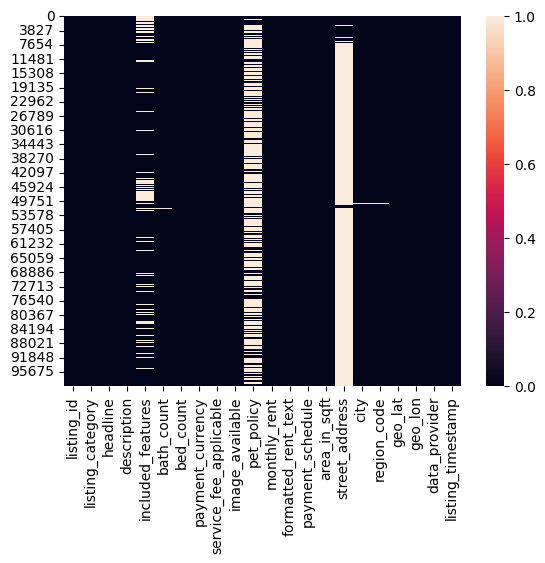

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull(),cbar=True)

In [252]:
data=data.drop(['headline','listing_id','payment_currency','listing_timestamp','formatted_rent_text','description','street_address'],axis=1)

In [253]:

data['included_features']=data['included_features'].fillna('')
data['bath_count']=data['bath_count'].fillna(data['bath_count'].median())
data['bed_count']=data['bed_count'].fillna(data['bed_count'].median())
data['pet_policy']=data['pet_policy'].fillna('')

data['monthly_rent']=data['monthly_rent'].fillna(data['monthly_rent'].median())

data['city']=data['city'].fillna(data['city'].mode()[0])
data['region_code']=data['region_code'].fillna(data['region_code'].mode()[0])

data['geo_lat'] = data['geo_lat'].fillna(data['geo_lat'].median())
data['geo_lon'] = data['geo_lon'].fillna(data['geo_lon'].median())

In [254]:
data.isnull().sum()

,0
listing_category,0
included_features,0
bath_count,0
bed_count,0
service_fee_applicable,0
image_available,0
pet_policy,0
monthly_rent,0
payment_schedule,0
area_in_sqft,0


In [255]:
data.duplicated().sum()

np.int64(7518)

In [256]:
data=data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [257]:
data.describe()

,bath_count,bed_count,monthly_rent,area_in_sqft,geo_lat,geo_lon
count,91974.000000,91974.000000,91974.000000,91974.000000,91974.000000,91974.000000
mean,1.447306,1.732403,1549.792354,961.528497,36.948706,-91.469450
std,0.549798,0.757150,924.386863,428.382388,4.610016,15.883538
min,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800
25%,1.000000,1.000000,1029.000000,730.000000,33.746500,-104.791300
50%,1.000000,2.000000,1370.000000,901.000000,37.272400,-84.517200
75%,2.000000,2.000000,1815.000000,1121.000000,39.962100,-77.545200
max,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800


In [258]:
data.head()

,listing_category,included_features,bath_count,bed_count,service_fee_applicable,image_available,pet_policy,monthly_rent,payment_schedule,area_in_sqft,city,region_code,geo_lat,geo_lon,data_provider
0,housing/rent/apartment,,1.0,1.0,No,Thumbnail,Cats,2195.0,Monthly,542,Redondo Beach,CA,33.8520,-118.3759,RentLingo
1,housing/rent/apartment,,1.5,3.0,No,Thumbnail,"Cats,Dogs",1250.0,Monthly,1500,Newport News,VA,37.0867,-76.4941,RentLingo
2,housing/rent/apartment,,2.0,3.0,No,Thumbnail,,1395.0,Monthly,1650,Raleigh,NC,35.8230,-78.6438,RentLingo
3,housing/rent/apartment,,1.0,2.0,No,Thumbnail,"Cats,Dogs",1600.0,Monthly,820,Vacaville,CA,38.3622,-121.9712,RentLingo
4,housing/rent/apartment,,1.0,1.0,No,Thumbnail,"Cats,Dogs",975.0,Monthly,624,Albuquerque,NM,35.1038,-106.6110,RentLingo


In [259]:
num=data.select_dtypes(include='number').columns
cat=data.select_dtypes(include='object').columns
print(cat,num)

Index(['listing_category', 'included_features', 'service_fee_applicable',
       'image_available', 'pet_policy', 'payment_schedule', 'city',
       'region_code', 'data_provider'],
      dtype='object') Index(['bath_count', 'bed_count', 'monthly_rent', 'area_in_sqft', 'geo_lat',
       'geo_lon'],
      dtype='object')


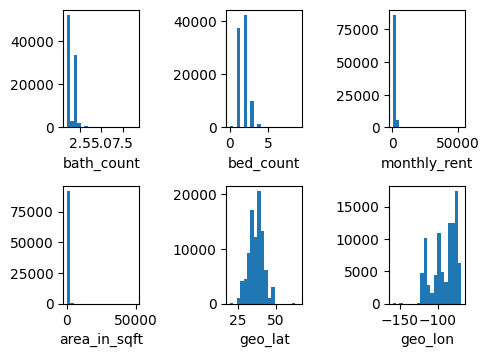

In [260]:
plt.figure(figsize=(5,5))
for i in range(len(num)):
  plt.subplot(3,3,i+1)
  plt.hist(data[num[i]],bins=20)
  plt.xlabel(num[i])
  plt.tight_layout()
plt.show()

In [261]:

for i in range(len(cat)):
  print(data[cat[i]].value_counts())

listing_category
housing/rent/apartment            91917
housing/rent/commercial/retail       38
housing/rent                          7
housing/rent/short_term               4
housing/rent/home                     4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64
included_features
                                                                                   15203
Parking                                                                             5572
Parking,Storage                                                                     1904
Gym,Pool                                                                            1779
Pool                                                                                1432
                                                                                   ...  
Hot Tub,Parking,View                                                                   1
AC,Patio/Deck,Refrigerator,TV       

In [262]:
#marking lass frequent category values as others
group_other=['listing_category','pet_policy','region_code','data_provider']
group_value=[40,200,80,40]
for i in range(len(group_other)):

  count=data[group_other[i]].value_counts()
  less_occured=count[count<group_value[i]].index
  data[group_other[i]]=data[group_other[i]].replace(less_occured,'other')

<Axes: xlabel='region_code', ylabel='monthly_rent'>

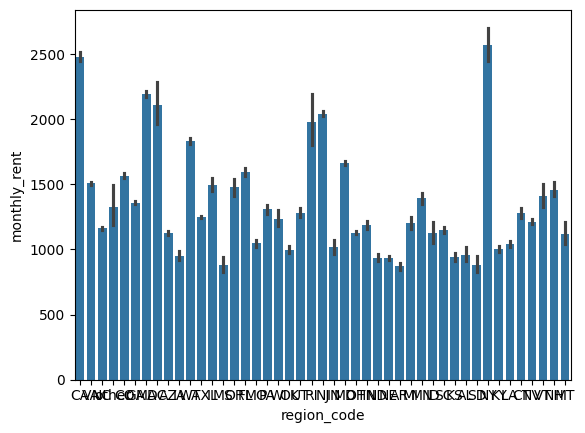

In [263]:
sns.barplot(x='region_code',y='monthly_rent',data=data)

In [264]:

for i in range(len(cat)):
  print(data[cat[i]].value_counts())

listing_category
housing/rent/apartment    91917
other                        57
Name: count, dtype: int64
included_features
                                                                                   15203
Parking                                                                             5572
Parking,Storage                                                                     1904
Gym,Pool                                                                            1779
Pool                                                                                1432
                                                                                   ...  
Hot Tub,Parking,View                                                                   1
AC,Patio/Deck,Refrigerator,TV                                                          1
Clubhouse,Dishwasher,Gym,Patio/Deck,Playground,Pool,Storage,Tennis,Washer Dryer        1
AC,Cable or Satellite,Dishwasher,Internet Access,Pool,Storage             

In [265]:
# import seaborn as sns
# plt.figure(figsize=(20,20))
# for i in range(len(cat)):
#   plt.subplot(4,4,i+1)
#   sns.barplot(x=cat[i],data=data)
#   plt.xlabel(cat[i])
#   plt.tight_layout()
# plt.show()

In [266]:
# #bivariate
# plt.figure(figsize=(6,5))
# for i in range(len(num)):
#   plt.subplot(3,3,i+1)
#   sns.scatterplot(x=num[i],y='monthly_rent',data=data)
#   plt.xlabel(num[i])
#   plt.tight_layout()
# plt.show()

In [267]:
# plt.figure(figsize=(30,30))
# for i in range(len(cat)):
#   plt.subplot(3,3,i+1)
#   sns.barplot(x=cat[i],y='monthly_rent',data=data)
#   plt.xlabel(cat[i])
#   plt.tight_layout()
# plt.show()

In [268]:
#drop payment schedule
data=data.drop('payment_schedule',axis=1)

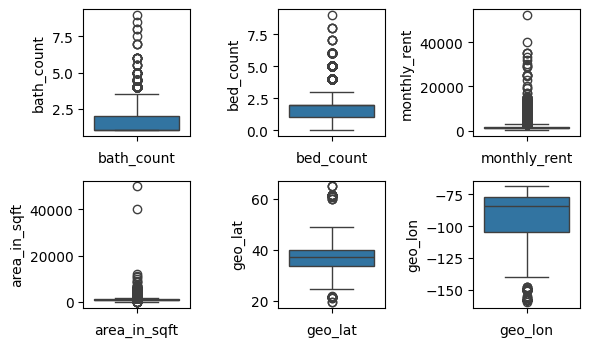

In [269]:
plt.figure(figsize=(6,5))
for i in range(len(num)):
  plt.subplot(3,3,i+1)
  sns.boxplot(y=data[num[i]])
  plt.xlabel(num[i])
  plt.tight_layout()
plt.show()

In [270]:
#outliers handling
def outlier(data,col):
  q1=data[col].quantile(0.25)
  q3=data[col].quantile(0.75)
  IQR=q3-q1
  l=q1-1.5*IQR
  u=q3+1.5*IQR
  print(l,u)
  data[col]=np.where(data[col]>u,u,np.where(data[col]<l,l,data[col]))
for i in num:
  outlier(data,i)


-0.5 3.5
-0.5 3.5
-150.0 2994.0
143.5 1707.5
24.423099999999994 49.2855
-145.66045000000003 -36.676049999999975


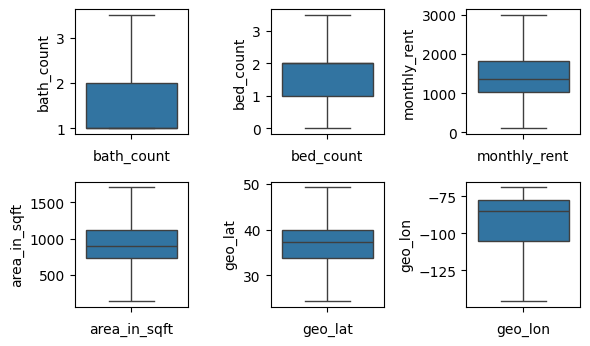

In [271]:
plt.figure(figsize=(6,5))
for i in range(len(num)):
  plt.subplot(3,3,i+1)
  sns.boxplot(y=data[num[i]])
  plt.xlabel(num[i])
  plt.tight_layout()
plt.show()

In [272]:
data[num].corr()

,bath_count,bed_count,monthly_rent,area_in_sqft,geo_lat,geo_lon
bath_count,1.000000,0.678712,0.318061,0.746667,-0.093427,-0.009345
bed_count,0.678712,1.000000,0.228331,0.722714,0.009032,0.040552
monthly_rent,0.318061,0.228331,1.000000,0.369604,0.104252,-0.101653
area_in_sqft,0.746667,0.722714,0.369604,1.000000,-0.038017,0.091739
geo_lat,-0.093427,0.009032,0.104252,-0.038017,1.000000,0.095270
geo_lon,-0.009345,0.040552,-0.101653,0.091739,0.095270,1.000000


In [274]:
data=data.drop('listing_category',axis=1)

In [275]:
from sklearn.cluster import KMeans
loc=data[['geo_lat','geo_lon']]
kmean=KMeans(n_clusters=12,random_state=42)
data['location']=kmean.fit_predict(loc)


In [276]:

data=data.drop('geo_lat',axis=1)
data=data.drop('geo_lon',axis=1)
data

,included_features,bath_count,bed_count,service_fee_applicable,image_available,pet_policy,monthly_rent,area_in_sqft,city,region_code,data_provider,location
0,,1.0,1.0,No,Thumbnail,Cats,2195.0,542.0,Redondo Beach,CA,RentLingo,2
1,,1.5,3.0,No,Thumbnail,"Cats,Dogs",1250.0,1500.0,Newport News,VA,RentLingo,4
2,,2.0,3.0,No,Thumbnail,,1395.0,1650.0,Raleigh,NC,RentLingo,1
3,,1.0,2.0,No,Thumbnail,"Cats,Dogs",1600.0,820.0,Vacaville,CA,RentLingo,2
4,,1.0,1.0,No,Thumbnail,"Cats,Dogs",975.0,624.0,Albuquerque,other,RentLingo,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99486,"Gym,Patio/Deck,Pool,Washer Dryer",1.0,1.0,No,Yes,"Cats,Dogs",798.0,650.0,Jacksonville,FL,RentDigs.com,9
99487,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,No,Yes,,780.0,605.0,Houston,TX,RentDigs.com,3
99489,"Garbage Disposal,Refrigerator",1.0,1.0,No,Yes,"Cats,Dogs",1325.0,650.0,San Diego,CA,RentDigs.com,2
99490,"Gym,Pool",1.0,1.0,No,Yes,"Cats,Dogs",931.0,701.0,Huntersville,NC,RentDigs.com,1


In [277]:
#multilabel binarizer for included features
data['included_features'] = data['included_features'].apply(
    lambda x: x.split(',') if isinstance(x, str) else (x if isinstance(x, list) else [])
)

from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer(sparse_output=False)

included_encode=mlb.fit_transform(data['included_features'])
included_encode=pd.DataFrame(included_encode,columns=mlb.classes_,index=data.index)
data=pd.concat([data,included_encode],axis=1)
data=data.drop('included_features',axis=1)


In [278]:
#target encoding for city filling mean rent per city
rent_per_city=data.groupby('city')['monthly_rent'].mean()
data['city_rent']=data['city'].map(rent_per_city)
data=data.drop('city',axis=1)

In [279]:
cat=[col for col in cat if col in data.columns]
data = pd.get_dummies(data, columns=cat, drop_first=True)
data

,bath_count,bed_count,monthly_rent,area_in_sqft,location,,AC,Alarm,Basketball,Cable or Satellite,Clubhouse,Dishwasher,Doorman,Elevator,Fireplace,Garbage Disposal,Gated,Golf,Gym,Hot Tub,Internet Access,Luxury,Parking,Patio/Deck,Playground,Pool,Refrigerator,Storage,TV,Tennis,View,Washer Dryer,Wood Floors,city_rent,service_fee_applicable_Yes,image_available_Thumbnail,image_available_Yes,pet_policy_Cats,"pet_policy_Cats,Dogs",pet_policy_other,region_code_AR,region_code_AZ,region_code_CA,region_code_CO,region_code_CT,region_code_DC,region_code_FL,region_code_GA,region_code_IA,region_code_ID,region_code_IL,region_code_IN,region_code_KS,region_code_KY,region_code_LA,region_code_MA,region_code_MD,region_code_MI,region_code_MN,region_code_MO,region_code_MS,region_code_MT,region_code_NC,region_code_ND,region_code_NE,region_code_NH,region_code_NJ,region_code_NV,region_code_NY,region_code_OH,region_code_OK,region_code_OR,region_code_PA,region_code_RI,region_code_SC,region_code_SD,region_code_TN,region_code_TX,region_code_UT,region_code_VA,region_code_VT,region_code_WA,region_code_WI,region_code_other,data_provider_GoSection8,data_provider_ListedBuy,data_provider_RENTCafé,data_provider_RealRentals,data_provider_RentDigs.com,data_provider_RentLingo,data_provider_other,data_provider_tenantcloud
0,1.0,1.0,2195.0,542.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2511.705882,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,1.5,3.0,1250.0,1500.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1085.467700,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
2,2.0,3.0,1395.0,1650.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1244.655131,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,1.0,2.0,1600.0,820.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1922.378378,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,1.0,1.0,975.0,624.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,975.923077,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99486,1.0,1.0,798.0,650.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1190.773946,False,False,True,False,True,False,False,False

In [280]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=data.drop('monthly_rent',axis=1)
y=data['monthly_rent']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [281]:

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [282]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse,mae,r2)

100229.57579846041 232.0717480998785 0.7410550209744882
